In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
import scipy.stats as stats

In [9]:
filename = "../Data/merged.csv"
merged = pd.read_csv(filename,index_col=0, encoding = "ISO-8859-1",  sep=',')
merged.head(9)

,sample_id,bases,contigs,windows,reads,mapped_reads,mapped_perc,secondary_alignments,mapped_paired_reads_first,mapped_paired_reads_second,...,chrY_coverage,chrY_deviation,chrM_len,chrM_mapped,chrM_coverage,chrM_deviation,core-result,core-t13,core-t18,core-t21
1,27652,3099922541,195,594,63678538,62732626,0.985146,0,31493578,31239048,...,0.079901,1.047883,16569,24315,1.467500,1.290940,negative,negative,negative,negative
2,27654,3099922541,195,594,56371636,54947834,0.974743,0,27746549,27201285,...,0.075262,1.138690,16569,23162,1.397912,1.198228,negative,negative,negative,negative
3,27656,3099922541,195,594,59334316,58098694,0.979175,0,29171469,28927225,...,0.083667,0.963131,16569,31177,1.881646,1.501025,negative,negative,negative,negative
5,27663,3099922541,195,594,61829824,60385368,0.976638,0,30458549,29926819,...,0.075682,1.031646,16569,50793,3.065544,2.097803,negative,negative,negative,negative
6,27665,3099922541,195,594,60415098,58932430,0.975459,0,29776173,29156257,...,0.070194,0.952894,16569,34095,2.057758,1.456849,negative,negative,negative,negative
7,27672,3099922541,195,594,72725000,70958355,0.975708,0,35625113,35333242,...,0.102880,1.112492,16569,86074,5.194882,2.500239,negative,negative,negative,negative
8,47769,3099922541,195,594,70133838,68936814,0.982932,0,34599932,34336882,...,0.074689,0.912895,16569,28070,1.694128,1.297133,positive,negative,positive,negative
9,47787,3099922541,195,594,65889934,64479479,0.978594,0,32361344,32118135,...,0.088403,0.977519,16569,39963,2.411914,1.717644,negative,negative,negative,negative
10,47800,3099922541,195,594,69751930,68513969,0.982252,0,34370371,34143598,...,0.081646,1.144748,16569,73031,4.407689,3.002479,negative,negative,negative,negative


In [8]:
#fig, ax = plt.subplots(figsize=(15,12))
#sns.heatmap(df.corr(), ax=ax, annot=True, fmt=".1f")
#plt.savefig('heatmap.png')

In [10]:
anomaly = merged[merged['core-result'] == 'positive']
normal = merged[merged['core-result'] == 'negative']

In [11]:
anomaly.describe()

,sample_id,bases,contigs,windows,reads,mapped_reads,mapped_perc,secondary_alignments,mapped_paired_reads_first,mapped_paired_reads_second,...,chrX_coverage,chrX_deviation,chrY_len,chrY_mapped,chrY_coverage,chrY_deviation,chrM_len,chrM_mapped,chrM_coverage,chrM_deviation
count,39.000000,3.900000e+01,39.0,39.0,3.900000e+01,3.900000e+01,39.000000,39.0,3.900000e+01,3.900000e+01,...,39.000000,39.000000,39.0,3.900000e+01,39.000000,39.000000,39.0,3.900000e+01,39.000000,39.000000
mean,65564.487179,3.099923e+09,195.0,594.0,6.099971e+07,5.893731e+07,0.964747,0.0,2.960983e+07,2.932748e+07,...,0.618812,0.867431,57227415.0,4.601707e+06,0.080411,1.016760,16569.0,5.044483e+05,30.445305,8.809053
std,10460.631217,0.000000e+00,0.0,0.0,1.082798e+07,1.109873e+07,0.021316,0.0,5.592599e+06,5.506915e+06,...,0.126001,0.116912,0.0,8.320873e+05,0.014540,0.170850,0.0,1.354152e+06,81.728074,20.649367
min,47769.000000,3.099923e+09,195.0,594.0,4.364341e+07,4.038351e+07,0.907047,0.0,2.027280e+07,2.011071e+07,...,0.386661,0.677796,57227415.0,3.271888e+06,0.057173,0.702763,16569.0,1.269700e+04,0.766311,0.921563
25%,57026.000000,3.099923e+09,195.0,594.0,5.689639e+07,5.363122e+07,0.954009,0.0,2.691765e+07,2.671357e+07,...,0.567760,0.822055,57227415.0,4.058902e+06,0.070926,0.925902,16569.0,3.616850e+04,2.182902,1.666546
50%,67000.000000,3.099923e+09,195.0,594.0,5.960555e+07,5.740643e+07,0.972776,0.0,2.882084e+07,2.859281e+07,...,0.604808,0.858368,57227415.0,4.530388e+06,0.079165,1.007213,16569.0,9.208700e+04,5.557789,3.063936
75%,73792.000000,3.099923e+09,195.0,594.0,6.251344e+07,6.057525e+07,0.980915,0.0,3.044816e+07,3.011671e+07,...,0.649129,0.886289,57227415.0,5.022688e+06,0.087767,1.079522,16569.0,4.408515e+05,26.607007,8.260862
max,82761.000000,3.099923e+09,195.0,594.0,1.119798e+08,1.102531e+08,0.988179,0.0,5.548313e+07,5.476996e+07,...,1.139342,1.463965,57227415.0,7.845171e+06,0.137088,1.717881,16569.0,8.228526e+06,496.621764,128.204272


In [12]:
normal.describe()

,sample_id,bases,contigs,windows,reads,mapped_reads,mapped_perc,secondary_alignments,mapped_paired_reads_first,mapped_paired_reads_second,...,chrX_coverage,chrX_deviation,chrY_len,chrY_mapped,chrY_coverage,chrY_deviation,chrM_len,chrM_mapped,chrM_coverage,chrM_deviation
count,2779.000000,2.779000e+03,2779.0,2779.0,2.779000e+03,2.779000e+03,2779.000000,2779.0,2.779000e+03,2.779000e+03,...,2779.000000,2779.000000,2779.0,2.779000e+03,2779.000000,2779.000000,2779.0,2.779000e+03,2779.000000,2779.000000
mean,67025.965455,3.099923e+09,195.0,594.0,6.186615e+07,5.976672e+07,0.966018,0.0,3.001498e+07,2.975174e+07,...,0.629039,0.867211,57227415.0,4.478714e+06,0.078262,0.989932,16569.0,9.030632e+05,54.503182,13.495441
std,10286.369192,0.000000e+00,0.0,0.0,7.396325e+06,7.295864e+06,0.024457,0.0,3.664820e+06,3.632235e+06,...,0.083597,0.066125,0.0,9.016851e+05,0.015756,0.180368,0.0,1.878445e+06,113.371030,24.890661
min,9153.000000,3.099923e+09,195.0,594.0,4.050059e+07,3.987285e+07,0.693092,0.0,1.999324e+07,1.983492e+07,...,0.292894,0.572662,57227415.0,2.580139e+06,0.045086,0.587097,16569.0,6.051000e+03,0.365200,0.620670
25%,57566.500000,3.099923e+09,195.0,594.0,5.735366e+07,5.495321e+07,0.961386,0.0,2.762242e+07,2.734545e+07,...,0.575845,0.829526,57227415.0,3.883932e+06,0.067868,0.875599,16569.0,4.162500e+04,2.512222,1.788210
50%,68394.000000,3.099923e+09,195.0,594.0,6.132925e+07,5.922152e+07,0.973787,0.0,2.972959e+07,2.948822e+07,...,0.622724,0.864963,57227415.0,4.358608e+06,0.076163,0.966354,16569.0,2.138980e+05,12.909530,4.706362
75%,75851.000000,3.099923e+09,195.0,594.0,6.561335e+07,6.355648e+07,0.980224,0.0,3.191019e+07,3.163072e+07,...,0.674059,0.900276,57227415.0,4.917010e+06,0.085921,1.080187,16569.0,9.426250e+05,56.890881,14.754890
max,82799.000000,3.099923e+09,195.0,594.0,1.777456e+08,1.500255e+08,0.989782,0.0,7.531415e+07,7.471131e+07,...,1.599301,2.421039,57227415.0,1.672294e+07,0.292219,3.010691,16569.0,2.683910e+07,1619.838373,421.268849


## Inserts

#### mean_insert_size

In [13]:
merged['mean_insert_size'].describe()

count      2818.000000
mean      22966.919062
std       13977.322043
min        5476.356500
25%       14197.024500
50%       18845.434850
75%       27365.436500
max      150217.773300
Name: mean_insert_size, dtype: float64

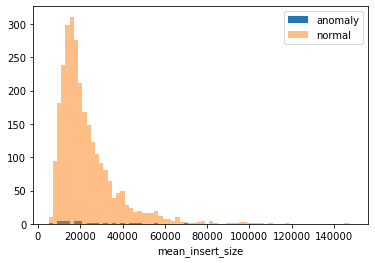

In [15]:
bins = np.arange(5000, 151000, 2000)

plt.hist(anomaly['mean_insert_size'], bins, alpha=1, label='anomaly')
plt.hist(normal['mean_insert_size'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('mean_insert_size')
plt.show()

#### std_insert_size

In [16]:
merged['std_insert_size'].describe()

count    2.818000e+03
mean     1.537438e+06
std      4.724075e+05
min      7.115085e+05
25%      1.209061e+06
50%      1.428730e+06
75%      1.776391e+06
max      3.906132e+06
Name: std_insert_size, dtype: float64

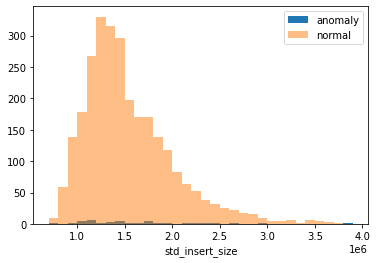

In [17]:
bins = np.arange(700000, 4000000, 100000)

plt.hist(anomaly['std_insert_size'], bins, alpha=1, label='anomaly')
plt.hist(normal['std_insert_size'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('std_insert_size')
plt.show()

#### median_insert_size

In [18]:
merged['median_insert_size'].describe()

count    2818.000000
mean      162.793116
std         3.031628
min       134.000000
25%       162.000000
50%       163.000000
75%       165.000000
max       171.000000
Name: median_insert_size, dtype: float64

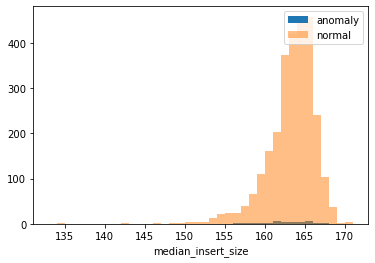

In [19]:
bins = np.arange(133, 172, 1)

plt.hist(anomaly['median_insert_size'], bins, alpha=1, label='anomaly')
plt.hist(normal['median_insert_size'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('median_insert_size')
plt.show()

## ACGT

### Adenine

#### A_num

In [20]:
merged['A_num'].describe()

count    2.818000e+03
mean     5.888152e+08
std      7.661264e+07
min      3.694918e+08
25%      5.387845e+08
50%      5.837776e+08
75%      6.292147e+08
max      1.505472e+09
Name: A_num, dtype: float64

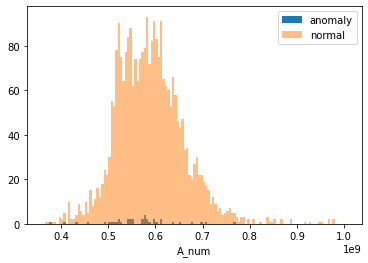

In [41]:
bins = np.arange(360000000, 1010000000, 5000000)

plt.hist(anomaly['A_num'], bins, alpha=1, label='anomaly')
plt.hist(normal['A_num'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('A_num')
plt.show()

#### A_perc

In [23]:
merged['A_perc'].describe()

count    2818.000000
mean        0.286426
std         0.006012
min         0.259400
25%         0.283000
50%         0.287300
75%         0.291000
max         0.300000
Name: A_perc, dtype: float64

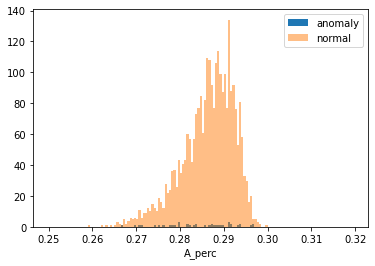

In [36]:
bins = np.arange(0.25, 0.32, 0.0005)

plt.hist(anomaly['A_perc'], bins, alpha=1, label='anomaly')
plt.hist(normal['A_perc'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('A_perc')
plt.show()

### Cytosine

#### C_num

In [29]:
merged['C_num'].describe()

count    2.818000e+03
mean     4.430464e+08
std      5.246095e+07
min      2.921395e+08
25%      4.113616e+08
50%      4.376238e+08
75%      4.688343e+08
max      1.087135e+09
Name: C_num, dtype: float64

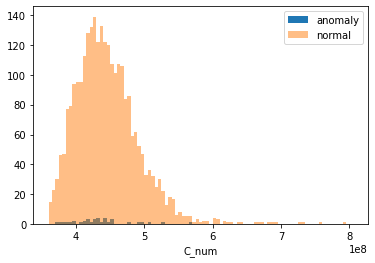

In [40]:
bins = np.arange(360000000, 810000000, 5000000)

plt.hist(anomaly['C_num'], bins, alpha=1, label='anomaly')
plt.hist(normal['C_num'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('C_num')
plt.show()

#### C_perc

In [32]:
merged['C_perc'].describe()

count    2818.000000
mean        0.215853
std         0.005835
min         0.200900
25%         0.211500
50%         0.215000
75%         0.219200
max         0.241800
Name: C_perc, dtype: float64

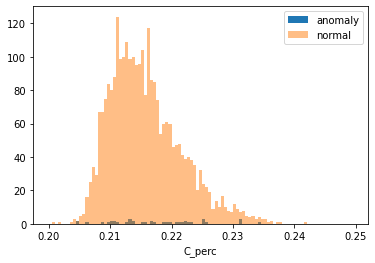

In [35]:
bins = np.arange(0.20, 0.25, 0.0005)

plt.hist(anomaly['C_perc'], bins, alpha=1, label='anomaly')
plt.hist(normal['C_perc'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('C_perc')
plt.show()

### Guanine

#### G_num

In [37]:
merged['G_num'].describe()

count    2.818000e+03
mean     4.239703e+08
std      5.028983e+07
min      2.780006e+08
25%      3.939052e+08
50%      4.188958e+08
75%      4.493658e+08
max      1.038605e+09
Name: G_num, dtype: float64

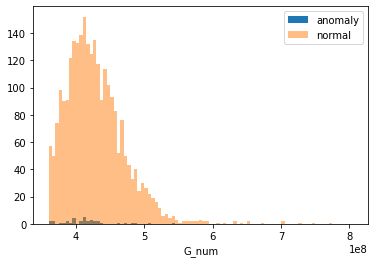

In [39]:
bins = np.arange(360000000, 810000000, 5000000)

plt.hist(anomaly['G_num'], bins, alpha=1, label='anomaly')
plt.hist(normal['G_num'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('G_num')
plt.show()

#### G_perc

In [42]:
merged['G_perc'].describe()

count    2818.000000
mean        0.206563
std         0.005886
min         0.192600
25%         0.202200
50%         0.205700
75%         0.209900
max         0.233500
Name: G_perc, dtype: float64

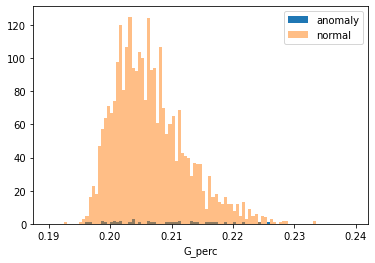

In [43]:
bins = np.arange(0.19, 0.24, 0.0005)

plt.hist(anomaly['G_perc'], bins, alpha=1, label='anomaly')
plt.hist(normal['G_perc'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('G_perc')
plt.show()

### Thymine

#### T_num

In [44]:
merged['T_num'].describe()

count    2.818000e+03
mean     5.984636e+08
std      7.782423e+07
min      3.766944e+08
25%      5.476311e+08
50%      5.931149e+08
75%      6.398308e+08
max      1.526447e+09
Name: T_num, dtype: float64

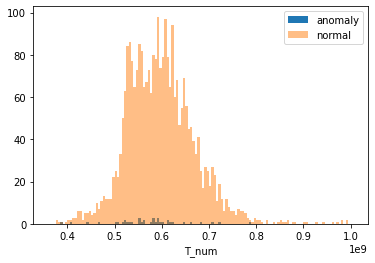

In [47]:
bins = np.arange(360000000, 1010000000, 5000000)

plt.hist(anomaly['T_num'], bins, alpha=1, label='anomaly')
plt.hist(normal['T_num'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('T_num')
plt.show()

#### T_perc

In [48]:
merged['T_perc'].describe()

count    2818.000000
mean        0.291116
std         0.005665
min         0.265300
25%         0.287800
50%         0.291900
75%         0.295300
max         0.308000
Name: T_perc, dtype: float64

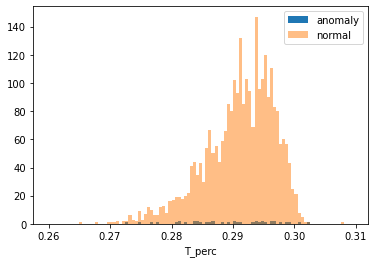

In [50]:
bins = np.arange(0.26, 0.31, 0.0005)

plt.hist(anomaly['T_perc'], bins, alpha=1, label='anomaly')
plt.hist(normal['T_perc'], bins, alpha=0.5, label='normal')
plt.legend(loc='upper right')
plt.xlabel('T_perc')
plt.show()